In [1]:
import os, shutil, pathlib

original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small_')
def make_subset(subset_name, start_index, end_index):
    for category in ('cat','dog'):
        dir = new_base_dir/subset_name/category
        os.makedirs(dir)
        fnames = [f'{category}.{i}.jpg'
            for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src = original_dir / fname,
                          dst = dir/fname)
            

In [2]:
make_subset('train', start_index = 0, end_index = 1000)
make_subset('validation', start_index = 1000, end_index = 1500)
make_subset('test', start_index = 1500, end_index = 2500)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'cats_vs_dogs_small_\\train\\cat'

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)


In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [6]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir /'train',
    image_size = (180,180),
    batch_size = 32)
validataion_dataset = image_dataset_from_directory(
    new_base_dir /'validation',
    image_size = (180,180),
    batch_size = 32)
test_dataset = image_dataset_from_directory(
    new_base_dir /'test',
    image_size = (180,180),
    batch_size = 32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'convert_from_scratch.keras',
        save_best_only = True,
        monitor = 'val_loss')
]

history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validataion_dataset,
    callbacks = callbacks)

Epoch 1/30
63/63 [==============================] - 72s 1s/step - loss: 0.7130 - accuracy: 0.5095 - val_loss: 0.6916 - val_accuracy: 0.6260
Epoch 2/30
63/63 [==============================] - 69s 1s/step - loss: 0.6980 - accuracy: 0.5425 - val_loss: 0.6877 - val_accuracy: 0.5940
Epoch 3/30
63/63 [==============================] - 71s 1s/step - loss: 0.6890 - accuracy: 0.5595 - val_loss: 0.6711 - val_accuracy: 0.6180
Epoch 4/30
63/63 [==============================] - 70s 1s/step - loss: 0.6619 - accuracy: 0.6165 - val_loss: 0.7010 - val_accuracy: 0.5540
Epoch 5/30
63/63 [==============================] - 71s 1s/step - loss: 0.6382 - accuracy: 0.6475 - val_loss: 0.6541 - val_accuracy: 0.5900
Epoch 6/30
63/63 [==============================] - 72s 1s/step - loss: 0.6056 - accuracy: 0.6730 - val_loss: 0.6375 - val_accuracy: 0.6330
Epoch 7/30
63/63 [==============================] - 85s 1s/step - loss: 0.5708 - accuracy: 0.6990 - val_loss: 0.6528 - val_accuracy: 0.6500
Epoch 8/30
63/63 [==

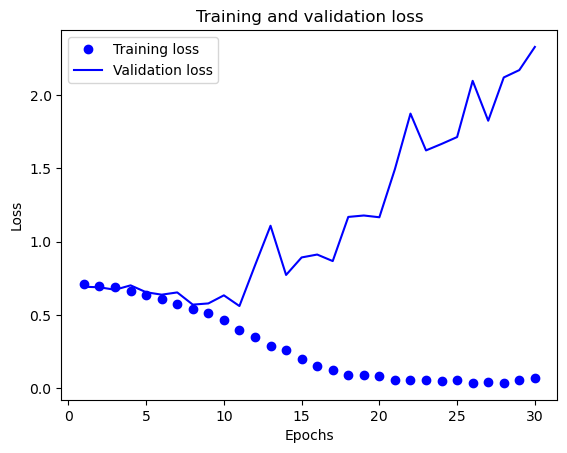

In [32]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']

history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

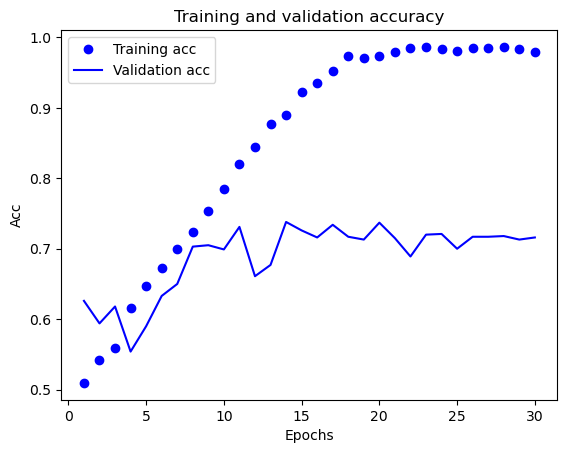

In [33]:
plt.clf() # 생성한 그래프를 clear
accuracy = history_dict['accuracy'] 
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training acc') 
plt.plot(epochs, val_accuracy, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Acc') 
plt.legend()
plt.show()

In [39]:
test_model = keras.models.load_model('convert_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도: {test_acc:.3f}')

63/63 [==============================] - 18s 284ms/step - loss: 0.6052 - accuracy: 0.7170
테스트 정확도: 0.717


# 데이터 증식

In [7]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

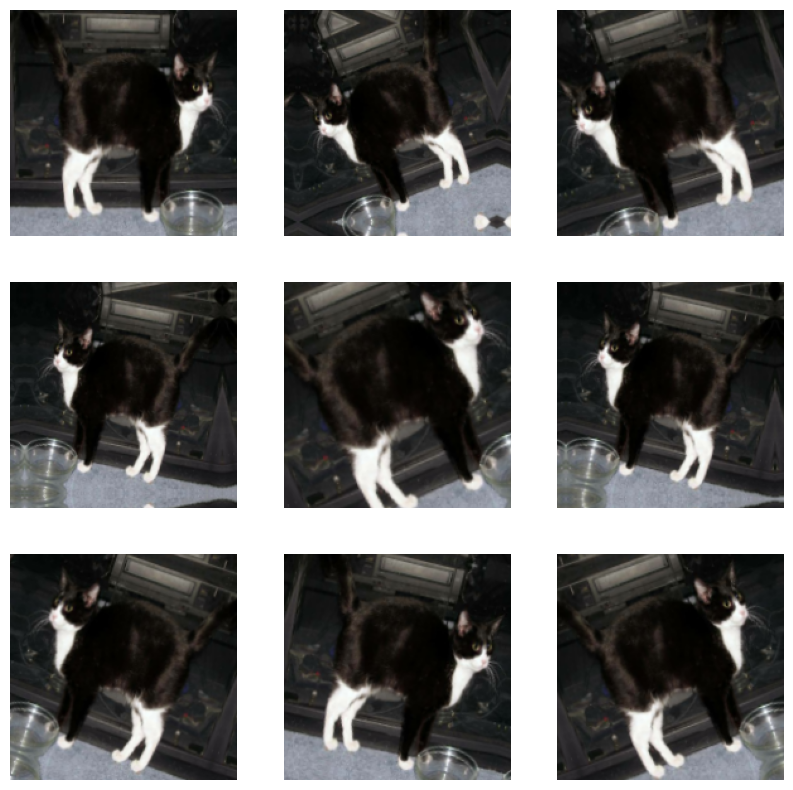

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [9]:
inputs = keras.Input(shape = (180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [10]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [11]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'convert_from_scratch_augmentation.keras',
        save_best_only = True,
        monitor = 'val_loss')
]

history = model.fit(
    train_dataset,
    epochs = 100,
    validation_data = validataion_dataset,
    callbacks = callbacks)

Epoch 1/100
63/63 [==============================] - 77s 1s/step - loss: 0.7027 - accuracy: 0.4995 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 75s 1s/step - loss: 0.6943 - accuracy: 0.5160 - val_loss: 0.6879 - val_accuracy: 0.5940
Epoch 3/100
63/63 [==============================] - 104s 2s/step - loss: 0.6896 - accuracy: 0.5545 - val_loss: 0.6720 - val_accuracy: 0.6120
Epoch 4/100
63/63 [==============================] - 84s 1s/step - loss: 0.6787 - accuracy: 0.6135 - val_loss: 0.6303 - val_accuracy: 0.6420
Epoch 5/100
63/63 [==============================] - 91s 1s/step - loss: 0.6177 - accuracy: 0.6580 - val_loss: 0.6613 - val_accuracy: 0.5910
Epoch 6/100
63/63 [==============================] - 87s 1s/step - loss: 0.5994 - accuracy: 0.6735 - val_loss: 0.6478 - val_accuracy: 0.6150
Epoch 7/100
63/63 [==============================] - 86s 1s/step - loss: 0.5849 - accuracy: 0.6905 - val_loss: 0.7177 - val_accuracy: 0.6080
Epoch 8/100


Epoch 59/100
63/63 [==============================] - 86s 1s/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 2.0554 - val_accuracy: 0.7760
Epoch 60/100
63/63 [==============================] - 88s 1s/step - loss: 0.0361 - accuracy: 0.9925 - val_loss: 2.3463 - val_accuracy: 0.7670
Epoch 61/100
63/63 [==============================] - 88s 1s/step - loss: 0.0385 - accuracy: 0.9890 - val_loss: 3.1045 - val_accuracy: 0.7130
Epoch 62/100
63/63 [==============================] - 86s 1s/step - loss: 0.0877 - accuracy: 0.9835 - val_loss: 3.4081 - val_accuracy: 0.7480
Epoch 63/100
63/63 [==============================] - 90s 1s/step - loss: 0.0578 - accuracy: 0.9890 - val_loss: 3.2121 - val_accuracy: 0.7390
Epoch 64/100
63/63 [==============================] - 88s 1s/step - loss: 0.0496 - accuracy: 0.9870 - val_loss: 2.6248 - val_accuracy: 0.7810
Epoch 65/100
63/63 [==============================] - 87s 1s/step - loss: 0.0580 - accuracy: 0.9870 - val_loss: 2.3084 - val_accuracy: 0.7830
Epoch 

In [13]:
test_model = keras.models.load_model('convert_from_scratch_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도: {test_acc:.3f}')

63/63 [==============================] - 15s 233ms/step - loss: 0.5323 - accuracy: 0.7415
테스트 정확도: 0.742


# 사전 훈련된 모델 활용하기